# PCA降维
这里展示一下pca降纬的方法，这里只介绍sklearn调用pca实现降维，不讨论pca的流程和细节。

首先导入包

In [2]:
import torch
import torch.nn as nn
import transformers
from transformers import BertConfig, BertModel, BertTokenizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # 加载PCA算法包

然后我们先得到一些数据，作为我们最后降维结果的一个展示。  
这里我们使用bert来embed一些句子，然后来降维展示。

In [3]:
# 先加载模型
pretrained_model_path = '../Bert_recall/Bert_cn'
tokenizer_path = '../Bert_recall/Bert_cn/vocab.txt'

# 直接加载预训练的中文bert模型
Model = BertModel.from_pretrained(pretrained_model_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_path, do_lower_case=True)

Some weights of the model checkpoint at ../Bert_recall/Bert_cn were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:1706: FutureWarning: Calling BertTokenizer.from_pretrained() with the p

我们先定义一些句子，然后用bert生成句向量，在pca降维后展示。

In [32]:
# 4行句子，分别代表逻辑上的4类句子
words = ['找个老师辅导', '找些保安来', '招聘厨师', '程序员在哪里', '我们需要医生', '我要找律师',
         '火车起火了', '汽车出了事故', '轮船撞了冰山', '摩托车翻车了', '拖拉机坏了',
         '苹果真甜', '我喜欢香蕉', '梨真好吃', '芒果闻着好香', '我想吃菠萝',
         '航班取消了么', '航班还准时么', '航班会延误么']

# embedding
words_source = tokenizer(words,
                        max_length=10,
                        truncation=True,
                        padding='max_length',
                        return_tensors='pt')
input_ids = words_source['input_ids']               
attention_mask = words_source['attention_mask']    
token_type_ids = words_source['token_type_ids'] 

# 输出，这就是我们要降维的数据了，即几个768维的向量。
Out = Model(input_ids, attention_mask, token_type_ids, output_hidden_states=True)
cls_out = Out['last_hidden_state'][:,0]
cls_out = cls_out.detach().numpy()
# print(cls_out)

PCA降维，plt画图。

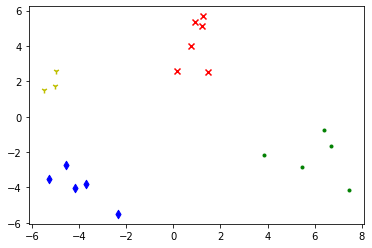

In [33]:
pac = PCA(n_components=2)
reduced_vecs = pac.fit_transform(cls_out)
x, y = [], []
a, b = [], []
c, d = [], []
e, f = [], []
for i in range(len(reduced_vecs)):
    if i < 6:
        x.append(reduced_vecs[i][0])
        y.append(reduced_vecs[i][1])
    elif i < 11:
        a.append(reduced_vecs[i][0])
        b.append(reduced_vecs[i][1])
    elif i < 16:
        c.append(reduced_vecs[i][0])
        d.append(reduced_vecs[i][1])
    else:
        e.append(reduced_vecs[i][0])
        f.append(reduced_vecs[i][1])
plt.scatter(x, y, c='r', marker='x')
plt.scatter(a, b, c='b', marker='d')
plt.scatter(c, d, c='g', marker='.')
plt.scatter(e, f, c='y', marker='1')
plt.show()